## CD8 T cell -- integration 

In [40]:
######### CD8
library(Seurat)
library(harmony)
library(org.Hs.eg.db)
library(clusterProfiler)
library(ggplot2)
library(RColorBrewer)
library(pheatmap)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [41]:
readRDS("/media/inspur/AS2150G2/LDK/sclc_metastasis/rds_from_Mr.wang/NSCLC_celltype.rds")-> subset_NSCLC
load("/media/inspur/AS2150G2/LDK/sclc_metastasis/data_out/2.SCLC.filter.rdata")
subset_SCLC <- SCLC.filter; rm(SCLC.filter);ls()

[1] "CD8cell"      "CT2"          "NSCLC_CD8T"   "SCLC_CD8T"    "subset_NSCLC"
[6] "subset_SCLC"

In [42]:
subset(subset_NSCLC, new_celltype %in% c("CD8T"))->NSCLC_CD8T
subset(subset_SCLC, celltype  %in% c("CD8T"))->SCLC_CD8T

NSCLC_CD8T[["CT"]]<-"NSCLC"
SCLC_CD8T[["CT"]]<-"SCLC"

In [43]:
CD8cell <- merge(NSCLC_CD8T, y = SCLC_CD8T, project = "CD8")

In [44]:
library(Seurat)
CD8cell <- NormalizeData(CD8cell, normalization.method = "LogNormalize", scale.factor = 10000)
CD8cell <- FindVariableFeatures(CD8cell, selection.method = "vst", nfeatures = 1500)
CD8cell <- ScaleData(CD8cell, features = VariableFeatures(object = CD8cell))
CD8cell <- RunPCA(CD8cell, npcs = 35, verbose = FALSE, features = VariableFeatures(object = CD8cell),seed.use=20)

Centering and scaling data matrix



In [45]:
library(harmony)
 CD8cell <- RunHarmony(CD8cell, c("orig.ident","CT") ,theda=c(2,1.5),lambda=c(1,1) )


Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


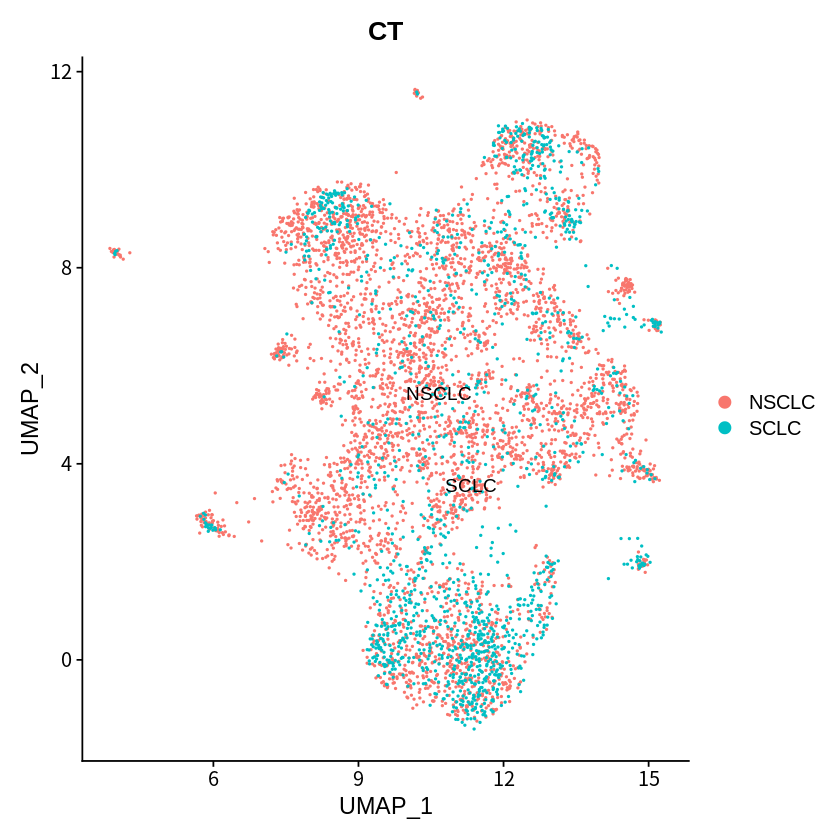

In [46]:
CD8cell <- RunUMAP(CD8cell, umap.method = 'umap-learn',reduction = "harmony", dims = 1:35, metric="correlation",seed.use=10)
DimPlot(CD8cell, reduction = "umap",label=T,group.by="CT")

In [47]:
CT2<-rep(NA,dim(CD8cell@meta.data)[1])
CT2[which(CD8cell@meta.data[,1] %in% c("LN_01","LN_02","LN_03","LN_04","LN_05","LN_06","LN_07","LN_08","LN_11","LN_12"))]<-"Normal"

CT2[which(CD8cell@meta.data[,1] %in% c("EBUS_10","BRONCHO_11","EBUS_12","EBUS_13","EBUS_15","EBUS_19","EBUS_51"))]<-"NSCLC_CD8"

CT2[which(CD8cell@meta.data[,1] %in% c("S1","S2","S3","S4","S5","S6","S7"))]<-"SCLC_CD8"

CD8cell[["CT2"]]<-CT2

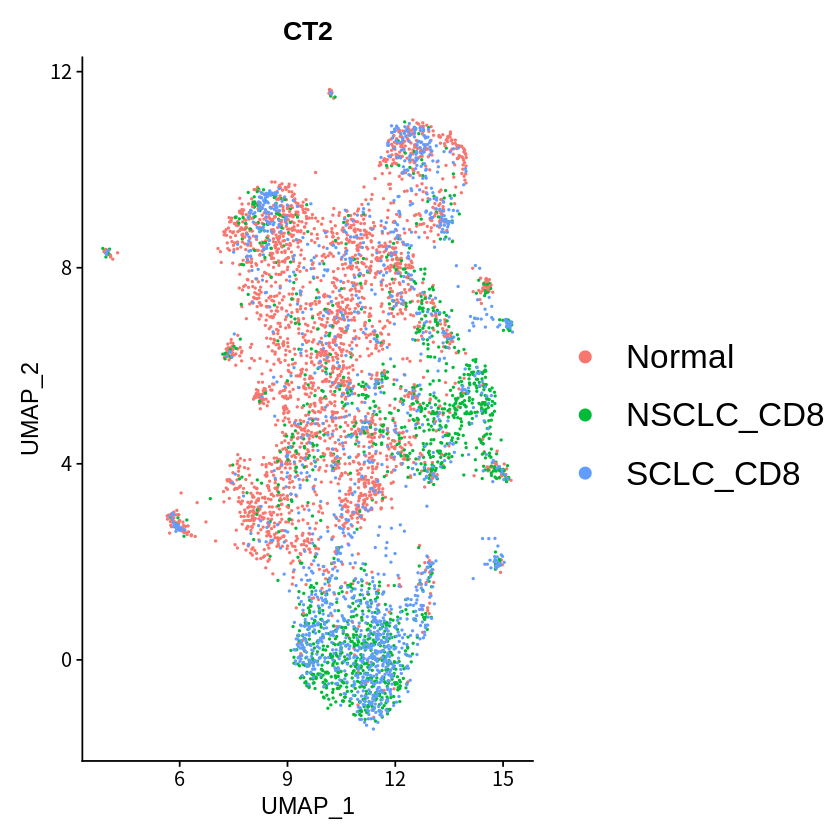

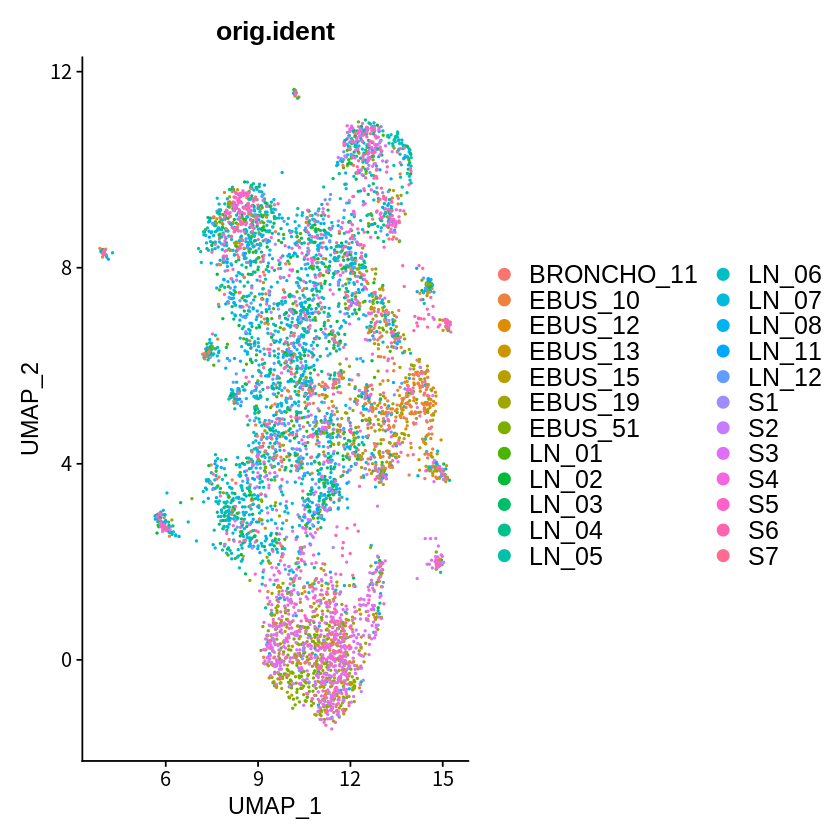

In [48]:
DimPlot(CD8cell, reduction = "umap",label=F,group.by="CT2") + 
theme(legend.key.size = unit(35,"pt"))+
theme(legend.text=element_text(size=20))

DimPlot(CD8cell, reduction = "umap",label=F,group.by="orig.ident") + theme(legend.text=element_text(size=15))

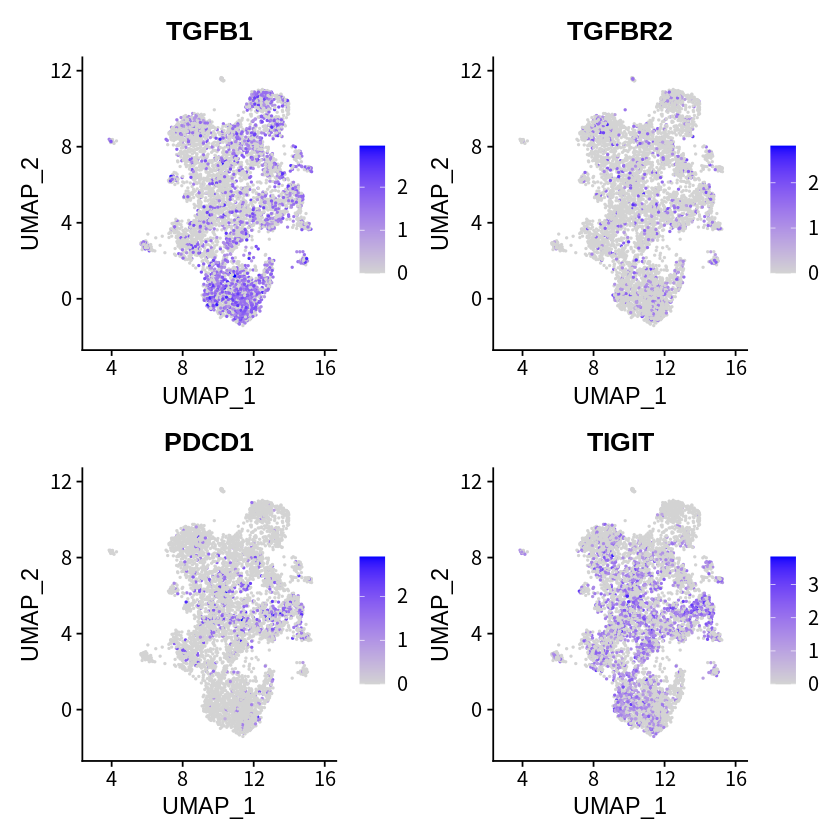

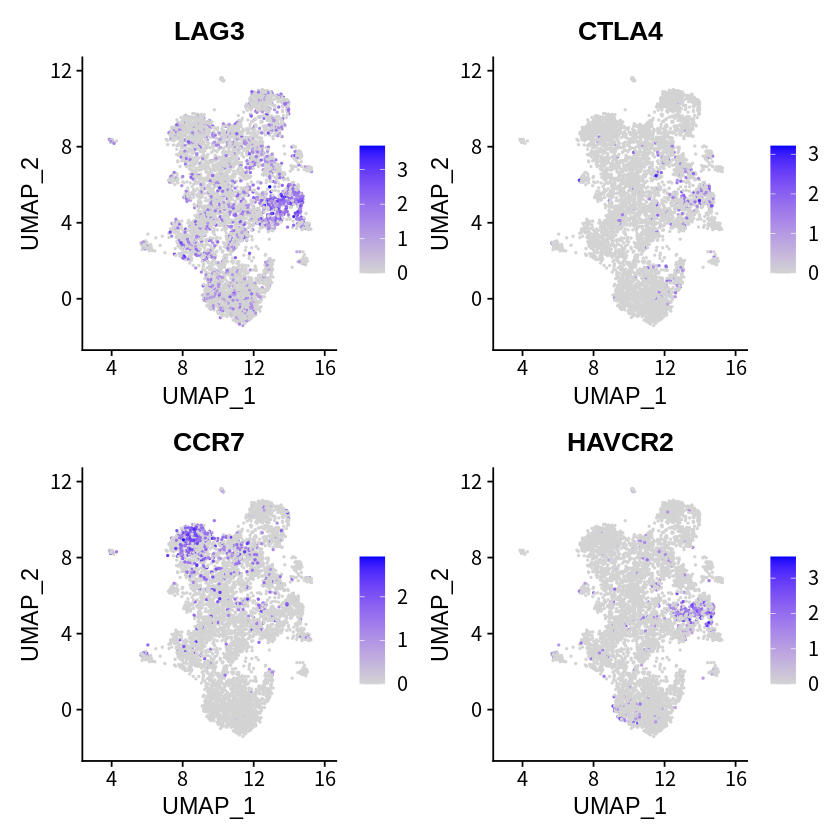

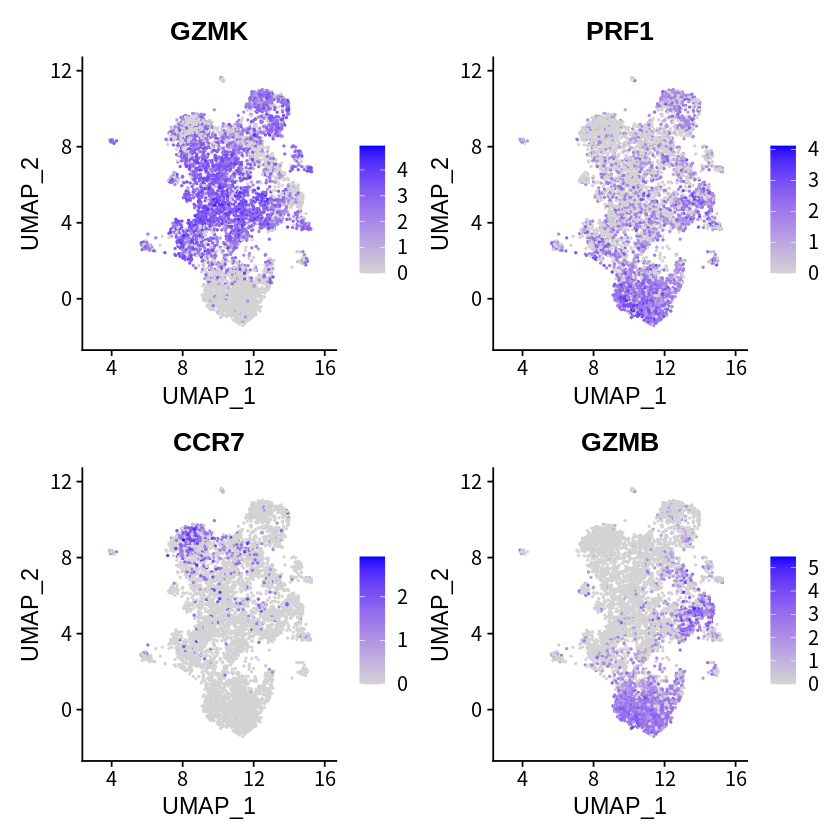

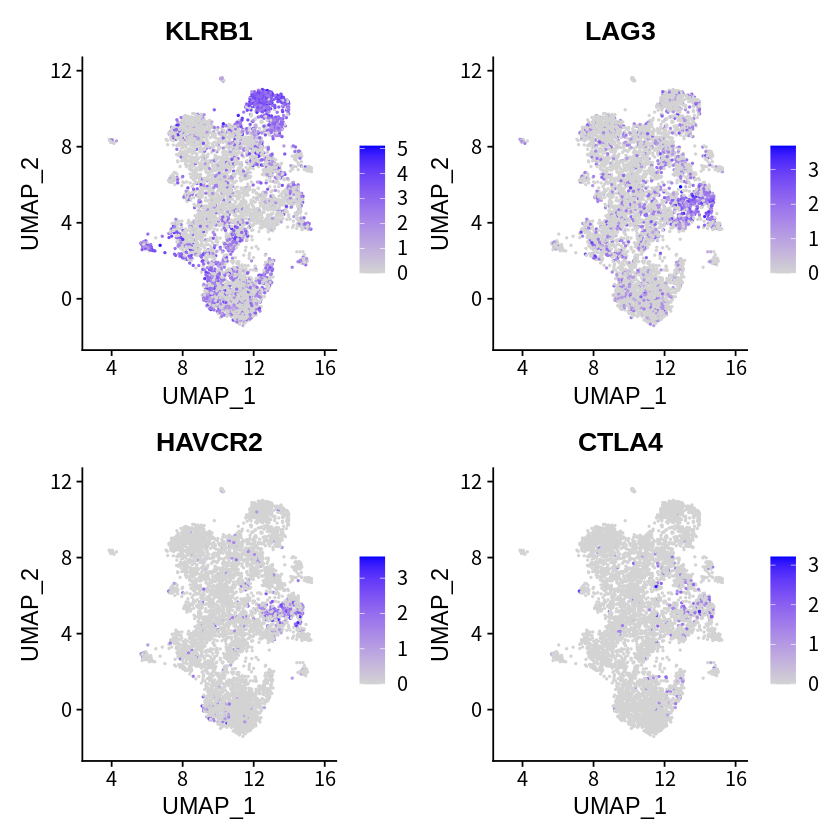

In [49]:
FeaturePlot(CD8cell,c("TGFB1","TGFBR2","PDCD1","TIGIT"))
FeaturePlot(CD8cell,c("LAG3","CTLA4","CCR7","HAVCR2"))
FeaturePlot(CD8cell,c("GZMK","PRF1","CCR7","GZMB"))

FeaturePlot(CD8cell,c("KLRB1","LAG3","HAVCR2","CTLA4"))

In [67]:
CD8cell <- FindNeighbors(CD8cell,reduction="harmony", dims = 1:35)
CD8cell <- FindClusters(CD8cell, resolution = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5702
Number of edges: 262899

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7740
Number of communities: 16
Elapsed time: 0 seconds


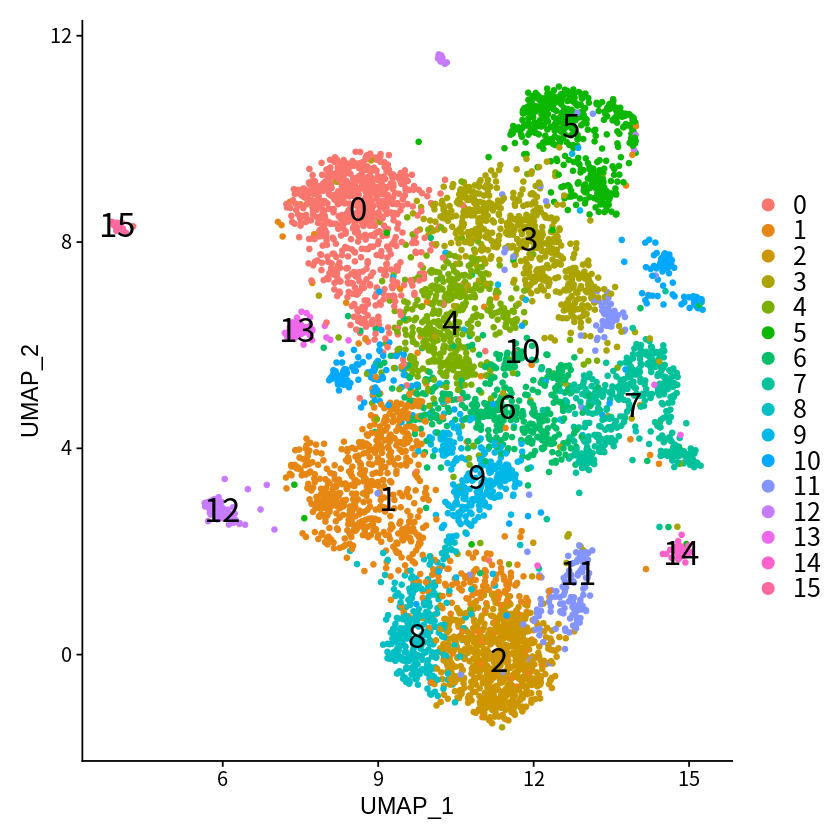

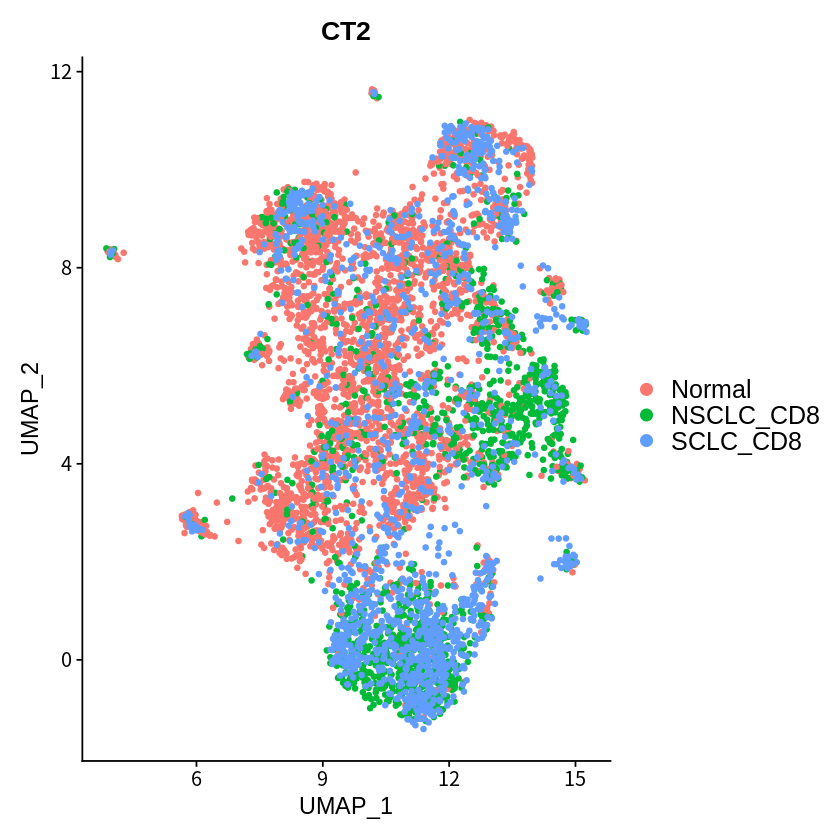

In [68]:
DimPlot(CD8cell, reduction = "umap",label=T,label.size = 7,pt.size = 1.2) + theme(legend.text=element_text(size=15))
DimPlot(CD8cell, reduction = "umap",label=F,pt.size = 1.2,group.by="CT2") + theme(legend.text=element_text(size=15))

           seurat_clusters
CT2           0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  Normal    515 455  15 361 354 258 232  67  21 208 118  45  63  43   7  18
  NSCLC_CD8  91 127 327 101  46  32 125 284 140  16  36  46   9  11  11   9
  SCLC_CD8  141 154 310 124  64 170  77  69 153  54  49  91  23   5  23   4

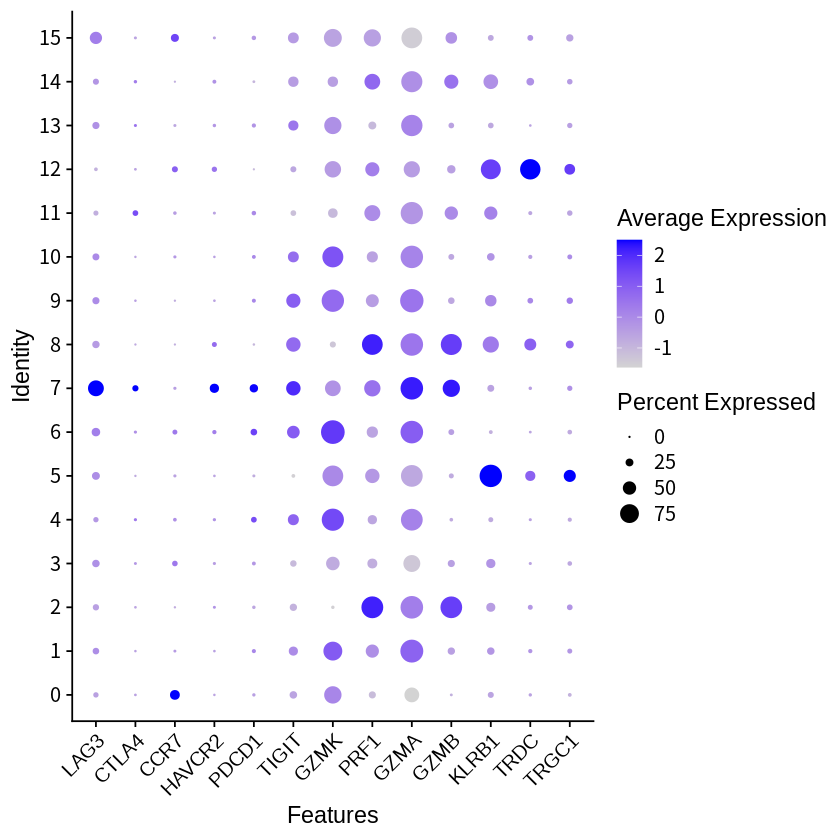

In [69]:
table(CD8cell@meta.data[,c("CT2","seurat_clusters")])
DotPlot(CD8cell, features=c("LAG3","CTLA4","CCR7","HAVCR2","PDCD1","TIGIT","GZMK","PRF1","GZMA","GZMB","KLRB1","TRDC","TRGC1")) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [70]:
new_label<-c("Naive_T",	"GZMK_T",	"eff_T",	"GZMK_T",	"GZMK_T",	"KLRB1_GZMK_T",	"GZMK_T",	"exh_T",	"eff_T",	"GZMK_T",	"GZMK_T",	"eff_T",	"KLRB1_GZMK_T",	"GZMK_T",	"GZMK_T",	"GZMK_T")
names(new_label) <- levels(CD8cell)

In [71]:
CD8cell <- RenameIdents(CD8cell, new_label)
Idents(CD8cell) <- factor(Idents(CD8cell), levels = c("eff_T", "GZMK_T","Naive_T","KLRB1_GZMK_T","exh_T")) 

In [92]:
CD8cell[["CT_CD8"]]<-factor(Idents(CD8cell), levels = rev(c("KLRB1_GZMK_T","Naive_T","exh_T", "eff_T", "GZMK_T")))

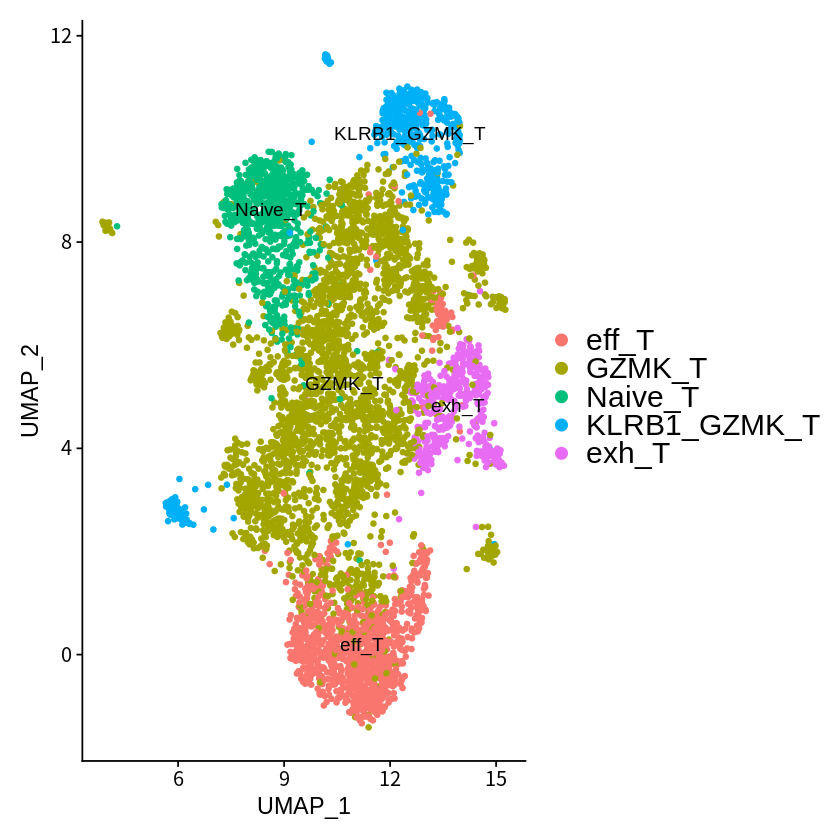

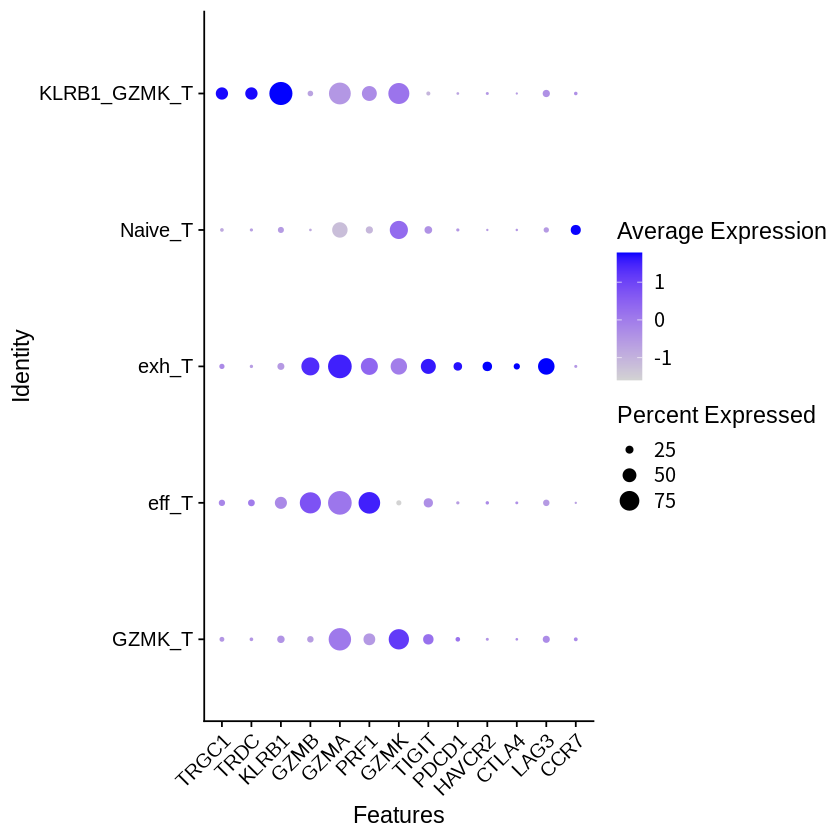

In [93]:
DimPlot(CD8cell, reduction = "umap",label=T,pt.size = 1.2) + 
# theme(legend.key.size = unit(35,"pt"))+
theme(legend.text=element_text(size=18))

DotPlot(CD8cell,group.by="CT_CD8", features=rev(c("CCR7","LAG3","CTLA4","HAVCR2","PDCD1","TIGIT","GZMK","PRF1","GZMA","GZMB","KLRB1","TRDC","TRGC1"))) +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) -> p 
p

In [88]:
library(ggplot2)
# ggsave(p, file = "plot/07/dotplot.CT_CD8.pdf", width  = 7,height = 3)

FindMarkers(CD8cell, ident.1="SCLC_CD8",ident.2="NSCLC_CD8" , group.by="CT2")->gg
go <- enrichGO(cand_gene ,OrgDb = org.Hs.eg.db, ont='BP',pAdjustMethod = 'fdr',pvalueCutoff = 0.05,       qvalueCutoff = 0.2 , keyType = 'SYMBOL')

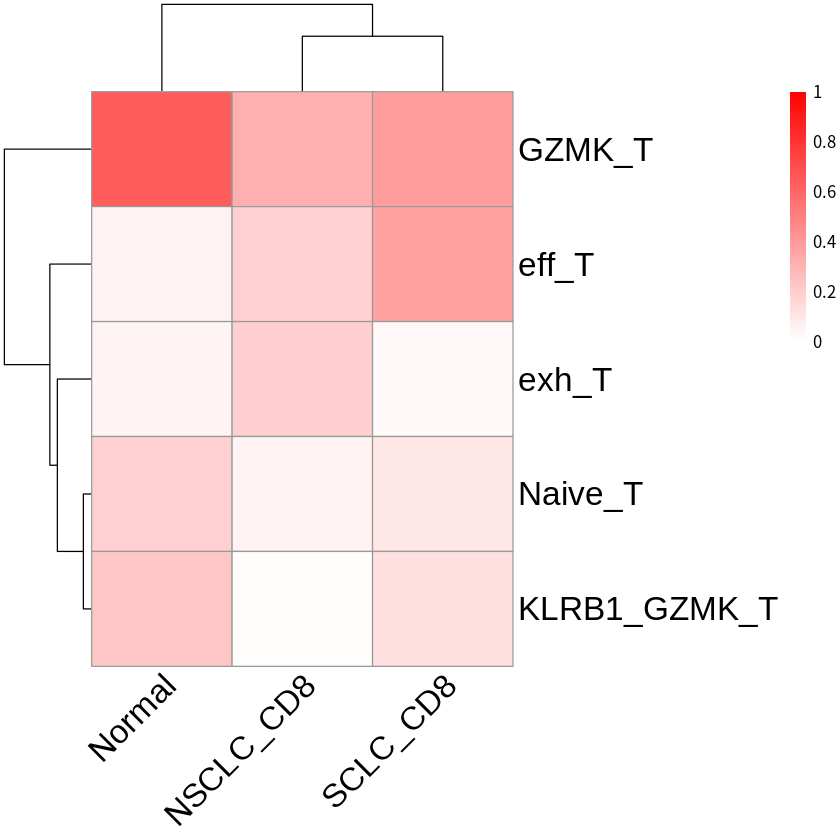

In [99]:
library(pheatmap)
table(CD8cell@meta.data[,c("CT_CD8","CT2")])/rowSums(table(CD8cell@meta.data[,c("CT2","CT_CD8")]))->heatmap_data
# heatmap_data <- heatmap_data[c("KLRB1_GZMK_T","Naive_T","exh_T", "eff_T", "GZMK_T"),]
pheatmap(heatmap_data,breaks=seq(0,1,length=100),color=colorRampPalette(c("white", "red"))(100), 
         fontsize_row = 20,
         fontsize_col = 20,
         angle_col = 45)

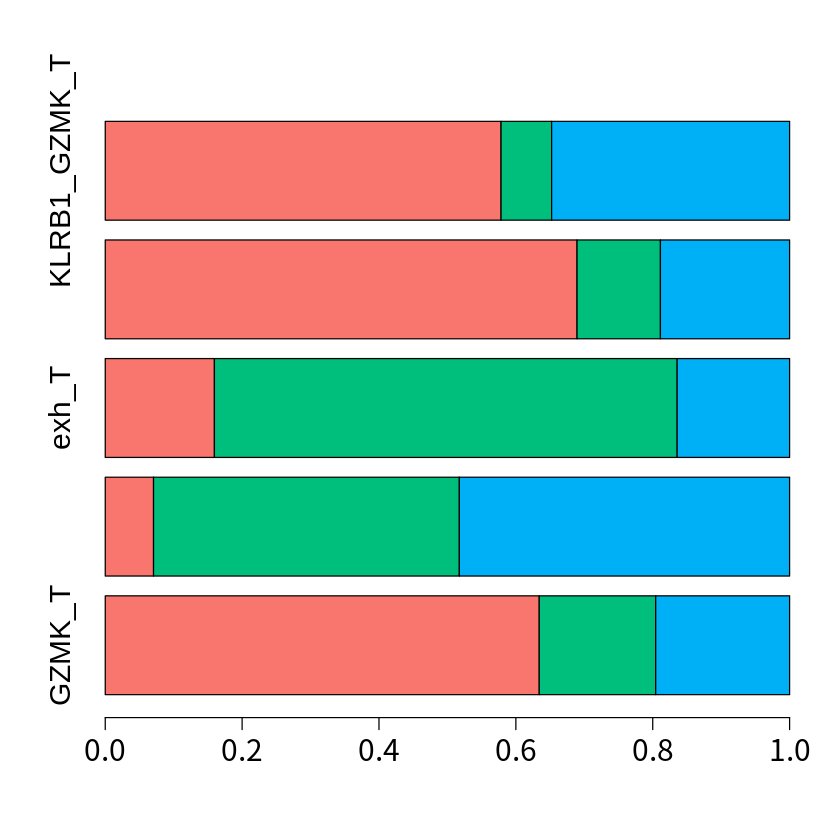

In [107]:
DimPlot(CD8cell, reduction = "umap",label=T,group.by="CT_CD8") ->xxxx
library(ggplot2)
unique(ggplot_build(xxxx)$data[[1]][,c("group","colour")])->color_list

 library(RColorBrewer)

barplot(t(t(table(CD8cell@meta.data[,c("CT2","CT_CD8")]))/colSums(table(CD8cell@meta.data[,c("CT2","CT_CD8")])))[,c("GZMK_T","eff_T","exh_T","Naive_T","KLRB1_GZMK_T")],
        col=c("#F8766D","#00BF7D","#00B0F6"),horiz=T, cex.axis=1.5,cex.names=1.5 ) 

In [109]:
# save work 
# save(CD8cell, file = "data_out/7.CD8cell.rdata")

In [3]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12       RColorBrewer_1.1-2    ggplot2_3.3.5        
 [4] clusterProfiler_4.2.1 org.Hs.eg.db_3.14.0   AnnotationDbi_1.56.2 
 [7] IRanges_2.28.0        S4Vectors_0.32.3      Biobase_2.54.0       
[10] BiocGenerics_0.40.0   harmony_0.1.0         Rcpp_1.0.7           
[13]